## Mini Programming Assignment 7: Dijkstra's Algorithm
###### *Notebook created by Jacob Kreider*

In the following notebook, I will compare the performance of the breadth-first search and Dijkstra's algorithms. I will generate a weighted, acyclic graph representing cities and drivetimes between NYC and Los Angeles, and present both the routes and drivetimes produced by each algorithm.

In [22]:
# First, we'll initialize each of our nodes in the graph 
graph = {}
graph['NYC'] = {}
graph['DC'] = {}
graph['Atlanta'] = {}
graph['New Orleans'] = {}
graph['Dallas'] = {}
graph['Indianapolis'] = {}
graph['Kansas City'] = {}
graph['Denver'] = {}
graph['Pittsburgh'] = {}
graph['Cincinatti'] = {}
graph['St Louis'] = {}
graph['OK City'] = {}
graph['Alburqurque'] = {}
graph['Salt Lake City'] = {}
graph['Phoenix'] = {}
graph['Las Vegas'] = {}
graph['San Diego'] = {}
graph['Los Angeles'] = {}


In [23]:
# Now, we'll add all the neighbor relationships

graph['NYC']['DC'] = 2
graph['NYC']['Pittsburgh'] = 7
graph['NYC']['Indianapolis'] = 11

graph['DC']['Atlanta'] = 2
graph['Atlanta']['New Orleans'] = 2
graph['New Orleans']['Dallas'] = 2
graph['Dallas']['Alburqurque'] = 2
graph['Alburqurque']['Phoenix'] = 2
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5
graph['San Diego']['Los Angeles'] = 2
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5

graph['Indianapolis']['Kansas City'] = 8
graph['Kansas City']['Denver'] = 7
graph['Denver']['Salt Lake City'] = 6
graph['Salt Lake City']['Las Vegas'] = 9

graph['Pittsburgh']['Cincinatti'] = 6
graph['Cincinatti']['St Louis'] = 8
graph['St Louis']['OK City'] = 7
graph['OK City']['Alburqurque'] = 9


In [24]:
# Next, create the cost table
# We'll set the cost at infinity for every node except DC, Pittsburgh, and 
# Indianapolis and let the algorithm figure out the true cost

infinity = float("inf")

costs = {}

costs['DC'] = 2
costs['Atlanta'] = infinity
costs['New Orleans'] = infinity
costs['Dallas'] = infinity
costs['Indianapolis'] = 11
costs['Kansas City'] = infinity
costs['Denver'] = infinity
costs['Pittsburgh'] = 7
costs['Cincinatti'] = infinity
costs['St Louis'] = infinity
costs['OK City'] = infinity
costs['Alburqurque'] = infinity
costs['Salt Lake City'] = infinity
costs['Phoenix'] = infinity
costs['Las Vegas'] = infinity
costs['San Diego'] = infinity
costs['Los Angeles'] = infinity


In [25]:

# Next, create a table for the parents. We'll set DC, Pittsburgh, and Atlanta
# to NYC and the rest to None
parents = {}

parents['DC'] = "NYC"
parents['Atlanta'] = None
parents['New Orleans'] = None
parents['Dallas'] = None
parents['Indianapolis'] = "NYC"
parents['Kansas City'] = None
parents['Denver'] = None
parents['Pittsburgh'] = "NYC"
parents['Cincinatti'] = None
parents['St Louis'] = None
parents['OK City'] = None
parents['Alburqurque'] = None
parents['Salt Lake City'] = None
parents['Phoenix'] = None
parents['Las Vegas'] = None
parents['San Diego'] = None
parents['Los Angeles'] = None

processed = []


In [26]:
# First use Breadth-first algorithm to find the fastest way to get to L.A from NYC, 
# capture the time that it will take to get to L.A. from NYC using the breadth first 
# algorithm (use the weights assigned to the routes even though breadth-first works 
# on unweighted edges but you should calculate on the side)

def BFS(graph, start, finish):
    # keep track of processed nodes
    processed = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == finish:
        return "You're already there!"
 
    # We need to check all possible paths
    while queue:
        # Take the first path
        path = queue.pop(0)
        # Find the last possible destination on this path
        node = path[-1]
        if node not in processed:
            neighbors = graph[node]
            # go through all neighbor nodes, make a new path and
            # push it into the queue
            for neighbor in neighbors:
                newPath = list(path)
                newPath.append(neighbor)
                queue.append(newPath)
                # return path if neighbour is goal
                if neighbor == finish:
                    print("Here's your route:")
                    return newPath
 
            # mark node as processed
            processed.append(node)
 
    # in case there's no path between the 2 nodes
    return "There's no way to get there!"
 
bfsPath = BFS(graph, 'NYC', 'Los Angeles')  
print("The shortest route is:")
print(bfsPath)


Here's your route:
The shortest route is:
['NYC', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles']


In [27]:
# Capturing the travel time

bfsCost = 0
bfsCost += (graph['NYC']['Indianapolis'] + graph['Indianapolis']['Kansas City']
            + graph['Kansas City']['Denver'] + graph['Denver']['Salt Lake City']
            + graph['Salt Lake City']['Las Vegas'] + graph['Las Vegas']['Los Angeles'])


print("The shortest route will take:")
print('%s hours' % bfsCost)

The shortest route will take:
46 hours


 Dijkstra's Algoithm from Grokking text

In [28]:
# function to find the lowest cost node, check neighboring costs, and updating
# the costs and parents to reflect the cheapest path

def findLowestCostNode(costs):
    lowestCost = float("inf")
    lowestCostNode = None
    for node in costs:
        cost = costs[node]
        if cost < lowestCost and node not in processed:
            lowestCost = cost
            lowestCostNode = node
    return lowestCostNode


In [29]:
# The algorithm
    
node = findLowestCostNode(costs) # Find lowest cost, unprocessed node
while node is not None: # While loop ends when all nodes have been processed
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys(): # Go through all neighors of node in question
        newCost = cost + neighbors[n] # Find cost to get to node through neighbor
        if costs[n] > newCost: # If it is cheaper this way
            costs[n] = newCost # update the cost to reflect this
            parents[n] = node # This node is now the parent of the neighbor
    processed.append(node) # mark the node as processed
    node = findLowestCostNode(costs) # Process the next node and loop
    



In [30]:
city = ["Los Angeles"]
cheapRoute = []
city.append(parents.get("Los Angeles"))
cheapRoute = list(city)

value = []

while value is not None:
    value = parents.get(city.pop())
    city.append(value)
    cheapRoute.append(value)

cheapRoute.remove(None)
cheapRoute.reverse()

print("The cheapest route is:")
print(cheapRoute)


The cheapest route is:
['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas', 'Alburqurque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']


In [36]:

for city in cheapRoute:
    cheapCost =  costs.get(city)
    

print("The cheapest route will take:")
print('%s hours' % cheapCost)


The cheapest route will take:
18 hours


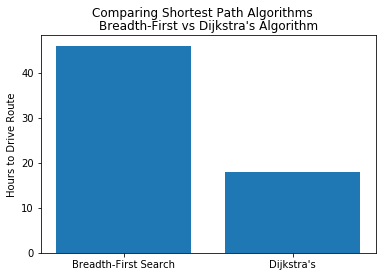

In [44]:
from matplotlib import pyplot as plt


plt.bar(["Breadth-First Search", "Dijkstra's"], [bfsCost, cheapCost])
plt.ylabel("Hours to Drive Route")
plt.suptitle("Comparing Shortest Path Algorithms")
plt.title("Breadth-First vs Dijkstra's Algorithm")

plt.show()

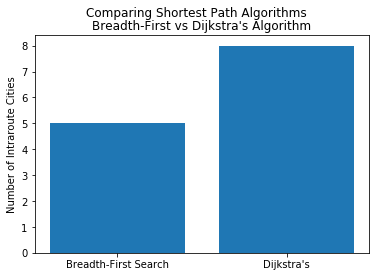

In [45]:
plt.bar(["Breadth-First Search", "Dijkstra's"], [len(bfsPath)-2, len(cheapRoute)-2])
plt.ylabel("Number of Intraroute Cities")
plt.suptitle("Comparing Shortest Path Algorithms")
plt.title("Breadth-First vs Dijkstra's Algorithm")
plt.show()

#### Executive Summary

Both of the above algorithms have their uses, and perform well at the tasks for which they were designed. While breadth-first cannot account for edge weights, it produced a far shorter paths in terms of node counts. Dijkstra's, on the other hand, required many more nodes (eight connecting nodes versus five for breadth-first), but it solved the route in nearly one-third the drivetime.